In [1]:
import re
import json
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
import networkx as nx
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
movie_data = namedtuple('movie', 'scenes, occurrences')

In [3]:
word_tokenizer = RegexpTokenizer(r'(\w+[-|\']?\w*)')

In [4]:
def script_to_secnens_dict(file_name):
    script = open(file_name,"r").read().decode("utf-8")
    scenes = defaultdict(str)
    matches = regex.finditer(script)
    for match in matches:
        sceneId = match.group(1)
        dialog = match.group(2)
        scenes[sceneId] += dialog
    return scenes

In [5]:
def handle_sr_jr(text, names):
    sr, jr = names
    results = []
    if jr in text:
        results.append(jr)
    if sr in text.split(" "):
        results.append(sr)
    return results

In [26]:
def process_script(script, tokenizer, name_mappings, special_cases=[], ignore=[], sr_jr={}):
    occurrences = defaultdict(set)
    scenes = script.split("_START OF NEW SCENE_")[1:]
    
    for index, scene in enumerate(scenes):
        text = scene.lower()
        tokens = tokenizer.tokenize(text)

        for key, name in special_cases.iteritems():
            if key in scene:
                occurrences[index].add(special_cases[key])

        for token in tokens:
            if token in ignore:
                continue
            elif sr_jr.has_key(token):
                pair = sr_jr[token]
                characters = handle_sr_jr(text, pair)
                print characters
                for character in characters:
                    occurrences[index].add(special_cases[character])
                
            elif name_mappings.has_key(token):
                occurrences[index].add(name_mappings[token][0])
    
    return movie_data(scenes=scenes, occurrences=occurrences)

In [7]:
def generate_movie_network(occurrences):
    network = nx.Graph()
    for scene, characters in occurrences.iteritems():
        for character in characters:
            network.add_node(character)
            for other in characters:
                if character != other:
                    network.add_edge(character, other)
    return network

In [8]:
def display_network(G):
    subgraphs = list(nx.connected_component_subgraphs(G))
    for subgraph in subgraphs:
        plt.figure(figsize=(20,20))
        plt.axis("off")
        nx.draw_networkx(subgraph, with_labels=True, edge_color="#cccccc")
        

In [9]:
def debug_characters_in_scenes(movie, sceneId):
    print movie.occurrences[sceneId], movie.scenes[sceneId]

In [10]:
def debug_scenes_by_character(movie, name):
    for scene, character in movie.occurrences.iteritems():
        if  name in character:
            print movie.scenes[scene]

In [11]:
def save_as_json(data, file_name):
    with open("../movieScripts/processed/" + file_name + ".json", 'w') as f:
        f.write(json.dumps(data))

In [12]:
files = [
    #"(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt",
    #"(3)_Harry_Potter_and_the_Prisoner_of_Azkaban.txt",
    "(4)_Harry_Potter_and_the_Goblet_of_Fire.txt"
]

In [13]:
with open('nameDict.json') as json_file:  
    name_dict = json.load(json_file, encoding="utf-8")

In [14]:
ignore_in_movie={
    "(2)_Harry_Potter_and_the_Chamber_of_Secrets.txt":["fluffy", "tufty", "gryffindor"],
    "(3)_Harry_Potter_and_the_Prisoner_of_Azkaban.txt":["miranda", "ernie", "horace"]
}

In [15]:
special_cases = {
    "WOOD":"oliver wood", 
    "oliver wood":"oliver wood", 
    "mrs. weasley": "molly weasley", 
    "mr. weasley": "arthur weasley",
    "arthur weasley's daughter": "ginny weasley",
    "ERNIE PRANG": "ernie prang",
    "wailing widow": "wailing widow",
    "Miss Brown": "lavender brown",
    "MRS BLACK": "Walburga Black",
    "BARTY JR":"barty crouch jr.",
    "BARTY":"barty crouch"
}

In [16]:
sr_jr_pairs = {
    "BARTY": ("BARTY", "BARTY JR")
}

In [17]:
movies = []

In [18]:
for script_name in files:
    with open("../movieScripts/" + script_name) as f:
        script = f.read()
        ignore = []
        if ignore_in_movie.has_key(script_name):
            ignore = ignore_in_movie[script_name]
            print ignore
        
        data = process_script(
            script=script, 
            tokenizer=word_tokenizer, 
            name_mappings=name_dict, 
            special_cases=special_cases, 
            ignore=ignore,
            sr_jr=sr_jr_pairs
        )
        movies.append(data)

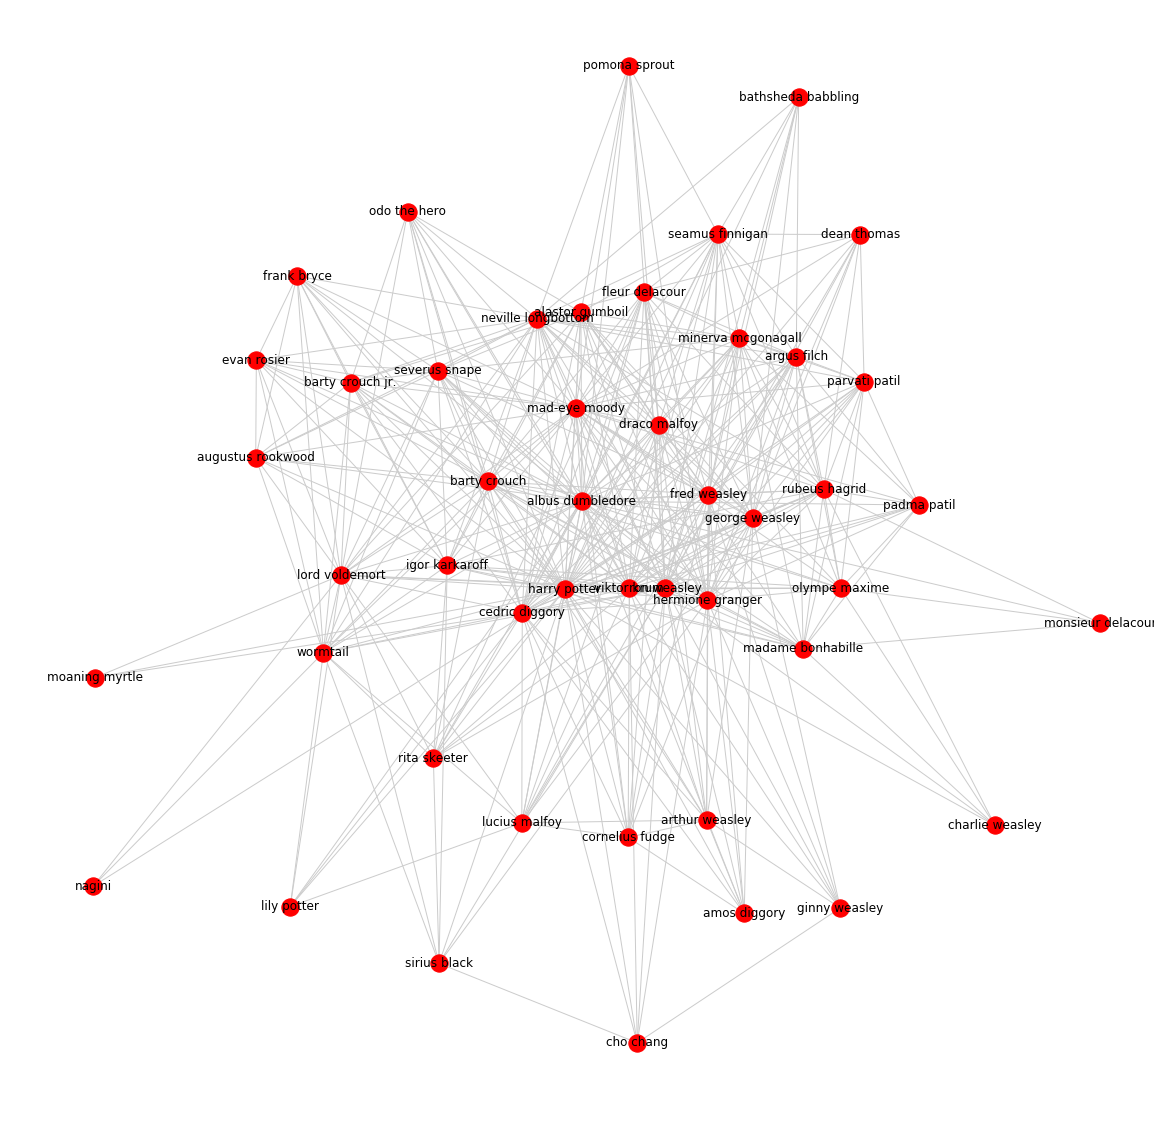

In [19]:
for movie in movies:
    G = generate_movie_network(movie.occurrences) 
    display_network(G)

In [28]:
sentence = "this is a barty jr strin"
sr = "barty"
jr = "barty jr"

In [23]:
jr in sentence

False

In [24]:
sr in sentence.split(" ")

True

In [30]:
def handle_sr_jr(text, names):
    sr, jr = names
    results = []
    if jr in text:
        results.append(jr)
    if sr in text.split(" "):
        results.append(sr)
    return results

In [31]:
handle_sr_jr(sentence, (sr,jr))

['barty jr', 'barty']